In [3]:
#load model and testing data
from tensorflow import keras
import pickle

with open('../local_data/rule2_test_img.pickle', 'rb') as f: 
    X_test, y_test = pickle.load(f)

model = keras.models.load_model('../models/pre_model_2_8.keras')

#to change model / data to evaluate, adjust the paths above
#data: ruleX_test_img.pickle where X is the rule number


to change models here are the corresponding names:
rule1 = ('../../models/pre_model_1_1_10_epochs.h5')
rule2 = ('../../models/pre_model_2_6.keras')
rule3 = ('../../models/pre_model_3_1_10_epochs.h5')
rule4 = ('../../models/pre_model_4_1_10_epochs.h5')
rule5 = ('../../models/pre_model_5_1_10_epochs.h5')
rule6 = ('../../models/pre_model_6_1_20_2_epochs.h5')
rule7 = ('../../models/pre_model_7_1_10_epochs.h5')
rule8 = ('../../models/pre_model_8_1_10_epochs.h5')

In [4]:
X_test.shape, y_test.shape

((442, 512, 512, 3), (442, 2))

In [5]:
import numpy as np
from keras.utils import to_categorical
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

#X_test = np.array(X_test)
#y_test = to_categorical(y_test, num_classes=2)

from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), predicted_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       281
           1       0.84      0.68      0.75       161

    accuracy                           0.84       442
   macro avg       0.84      0.80      0.82       442
weighted avg       0.84      0.84      0.83       442



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


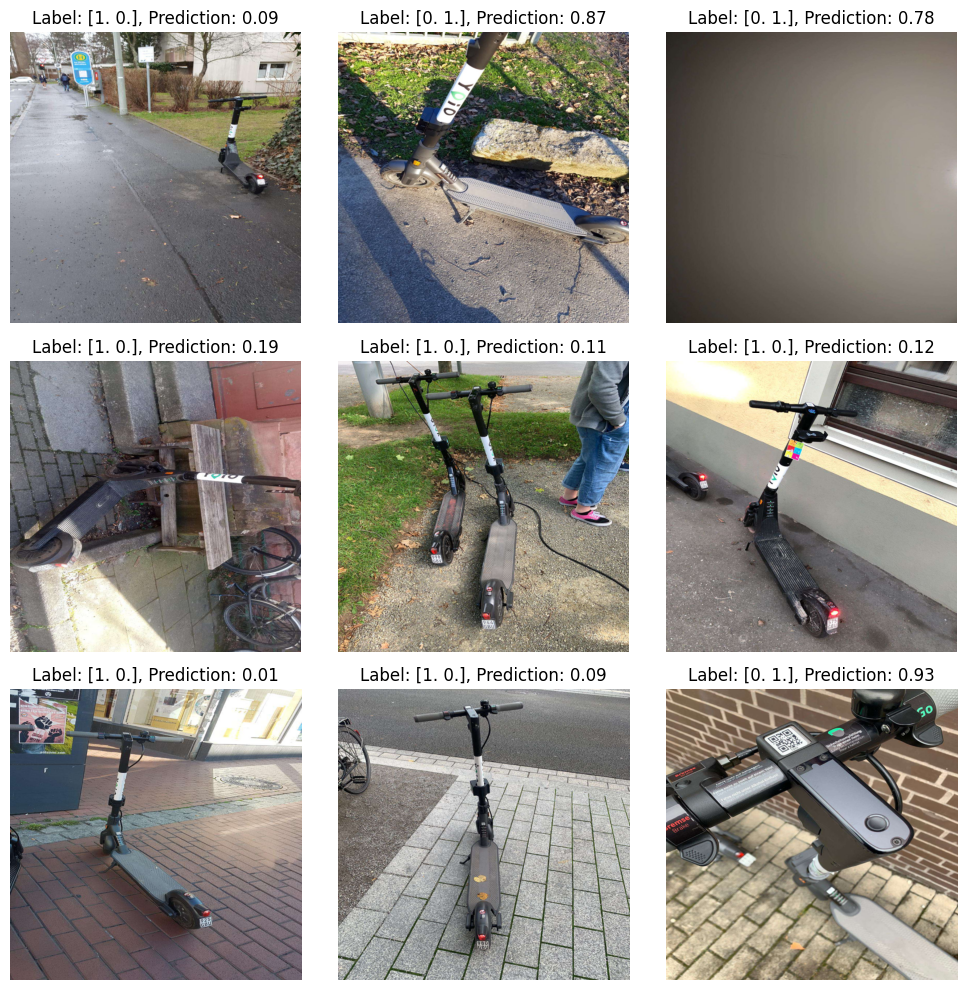

In [7]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[idx].astype(np.float32))
    ax.set_title(f"Label: {y_test[idx]}, Prediction: {model.predict((X_test.astype(np.float32))[idx][np.newaxis, ...])[0][1]:.2f}")
    ax.axis('off')
plt.tight_layout()
plt.show()